In [0]:
#Import necessary packages
import numpy as np
from keras.datasets import mnist
from keras.layers import Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Sequential
import matplotlib.pyplot as plt
from keras import backend as K

Using TensorFlow backend.


#Part 0: Importing and Normalizing Data

In [0]:
#Load MNIST data and normalize to [0,1]
(data_train, _), (data_test, _) = mnist.load_data()
data_train = data_train/255.0
data_test = data_test/255.0

11501568/11490434 [==============================] - 0s 0us/step


In [0]:
#Reshape training and testing data into 784-dimensional vectors

x_train=[]
for i in range(len(data_train)):
  x_train.append(np.reshape(data_train[i],(1,784)))
  
x_test=[]
for i in range(len(data_test)):
  x_test.append(np.reshape(data_test[i],(1,784)))
  
x_train = np.array(x_train).reshape(60000,784)
x_test = np.array(x_test).reshape(10000,784)

In [0]:
#Create autoencoder architecture
def deep_ae():
    model = Sequential()


    model.add(Dense(400,
                    activation='sigmoid',
                    use_bias=True,
                    kernel_initializer='uniform',
                   input_dim=784))
    model.add(Dense(200,
                    activation='sigmoid',
                    use_bias=True,
                    kernel_initializer='uniform'))
    model.add(Dense(100,
                    activation='sigmoid',
                    use_bias=True,
                    kernel_initializer='uniform'))
    model.add(Dense(200,
                    activation='sigmoid',
                    use_bias=True,
                    kernel_initializer='uniform'))
    model.add(Dense(400,
                    activation='sigmoid',
                    use_bias=True,
                    kernel_initializer='uniform'))
    model.add(Dense(784,
                    activation='sigmoid',
                    use_bias=True,
                    kernel_initializer='uniform'))

    return model

#Create deep autoencoder graph
deep_ae = deep_ae()

#Compile model using an appropriate loss and optimizer algorithm

deep_ae.compile(loss='mse',
                 optimizer='adam',
                 metrics=['accuracy'])

#Train the model and assign training meta-data to a variable

deep_ae_data = deep_ae.fit(x_train, x_train, validation_data=(x_test, x_test), epochs=150, batch_size=512, shuffle=True)

#Calculate the reconstructions of the testing set (output of autoencoder on test set)

reconstructed_images=deep_ae.predict(x_test)

#Obtain encoder representation of data
get_hl = K.function([deep_ae.layers[0].input], [deep_ae.layers[2].output]) #The third hidden layer is indexed at 2
deep_ae_hl = get_hl([x_test])[0]

Train on 60000 samples, validate on 10000 samples
Epoch 1/150
60000/60000 [==============================] - 11s 175us/step - loss: 0.0743 - acc: 0.0111 - val_loss: 0.0677 - val_acc: 0.0161
Epoch 2/150
60000/60000 [==============================] - 9s 156us/step - loss: 0.0674 - acc: 0.0105 - val_loss: 0.0676 - val_acc: 0.0083
Epoch 3/150
60000/60000 [==============================] - 8s 135us/step - loss: 0.0674 - acc: 0.0111 - val_loss: 0.0676 - val_acc: 0.0161
Epoch 4/150
60000/60000 [==============================] - 9s 151us/step - loss: 0.0674 - acc: 0.0129 - val_loss: 0.0676 - val_acc: 0.0143
Epoch 5/150
60000/60000 [==============================] - 9s 158us/step - loss: 0.0656 - acc: 0.0111 - val_loss: 0.0619 - val_acc: 0.0129
Epoch 6/150
60000/60000 [==============================] - 9s 151us/step - loss: 0.0608 - acc: 0.0097 - val_loss: 0.0601 - val_acc: 0.0128
Epoch 7/150
60000/60000 [==============================] - 10s 163us/step - loss: 0.0595 - acc: 0.0092 - val_loss: 

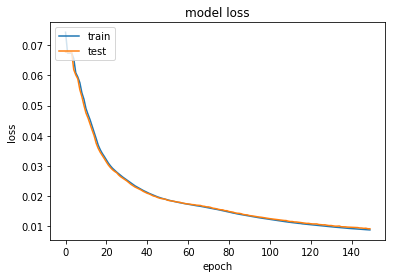

In [0]:
#Plot loss vs epoch

plt.plot(deep_ae_data.history['loss'])
plt.plot(deep_ae_data.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

10 test sample images


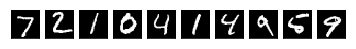

In [0]:
#Show samples of 10 images, their hidden layer representations, and their reconstructions
print("10 test sample images")
n=10
plt.figure()
for i in range(n):
  ax=plt.subplot(2,10,i+1)
  plt.imshow(x_test[i].reshape((28,28)))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  
  

first 10 images of the bottleneck layer


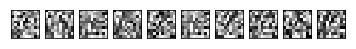

In [0]:
print("first 10 images of the bottleneck layer")
n=10
plt.figure()
for i in range(n):
  ax=plt.subplot(2,10,i+1)
  plt.imshow(deep_ae_hl[i].reshape((10,10)))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

10 reconstructed sample images


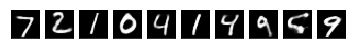

In [0]:
print("10 reconstructed sample images")
n=10
plt.figure()
for i in range(n):
  ax=plt.subplot(2,10,i+1)
  plt.imshow(reconstructed_images[i].reshape((28,28)))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

#Part 2: Deep Convolutional AutoEncoder

In [0]:
#Reshape data into 2-D signals and account for grayscale channel in each image

x_train = np.array(x_train).reshape(60000,28,28,1)
x_test = np.array(x_test).reshape(10000,28,28,1)

In [0]:
#Create Convolutional AutoEncoder Architecture
def cae():
    model = Sequential()
    
          
    model.add(Conv2D(16,
                     (3,3),
                     activation='sigmoid',
                     padding='same',
                     input_shape=(28,28,1)))
    
    model.add(MaxPooling2D((2,2),
                           padding='same'
                           ))
    model.add(Conv2D(8,
                     (3,3),
                     activation='sigmoid',
                     padding='same'))
    
    model.add(MaxPooling2D(pool_size=(2,2),
                           padding='same',
                           ))
    model.add(Conv2D(8,
                     (3,3),
                     activation='sigmoid',
                     padding='same'))
    model.add(UpSampling2D((2,2)))
    model.add(Conv2D(16,
                     (3,3),
                     activation='sigmoid',
                     padding='same'))
    model.add(UpSampling2D((2,2)))
    model.add(Conv2D(1,
                     (3,3),
                     activation='sigmoid',
                     padding='same',
                     ))
    return model

#Create deep autoencoder graph
conv_ae = cae()

#Compile model using an appropriate loss and optimizer algorithm

conv_ae.compile(loss='mse',
                 optimizer='adam',
                 metrics=['accuracy'])

#Train the model and assign training meta-data to a variable

conv_ae_data = conv_ae.fit(x_train, x_train, validation_data=(x_test, x_test), epochs=150, batch_size=512, shuffle=True)

#Calculate the reconstructions of the testing set (output of autoencoder on test set)

reconstructed_images_conv=conv_ae.predict(x_test)


#Obtain encoder representation of data
get_hl = K.function([conv_ae.layers[0].input], [conv_ae.layers[3].output])  # The fourth hidden layer are indexed at 3
conv_ae_hl = get_hl([x_test])[0]

Train on 60000 samples, validate on 10000 samples
Epoch 1/150
60000/60000 [==============================] - 72s 1ms/step - loss: 0.1177 - acc: 0.7669 - val_loss: 0.1011 - val_acc: 0.8072
Epoch 2/150
60000/60000 [==============================] - 69s 1ms/step - loss: 0.0971 - acc: 0.8088 - val_loss: 0.0955 - val_acc: 0.8072
Epoch 3/150
60000/60000 [==============================] - 69s 1ms/step - loss: 0.0887 - acc: 0.8088 - val_loss: 0.0824 - val_acc: 0.8072
Epoch 4/150
60000/60000 [==============================] - 70s 1ms/step - loss: 0.0706 - acc: 0.8069 - val_loss: 0.0594 - val_acc: 0.7885
Epoch 5/150
60000/60000 [==============================] - 70s 1ms/step - loss: 0.0529 - acc: 0.7860 - val_loss: 0.0462 - val_acc: 0.7900
Epoch 6/150
60000/60000 [==============================] - 70s 1ms/step - loss: 0.0399 - acc: 0.7956 - val_loss: 0.0344 - val_acc: 0.7992
Epoch 7/150
60000/60000 [==============================] - 70s 1ms/step - loss: 0.0312 - acc: 0.8019 - val_loss: 0.0277 - 

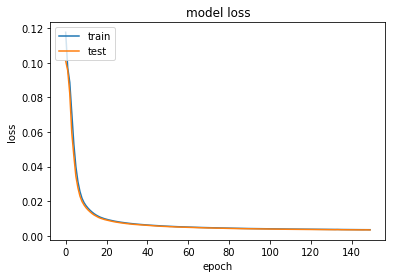

In [0]:
#Plot loss vs epoch

plt.plot(conv_ae_data.history['loss'])
plt.plot(conv_ae_data.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

10 test sample images


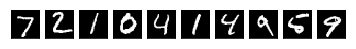

In [0]:
#Show samples of 10 images, their hidden layer representations, and their reconstructions


print("10 test sample images")
n=10
plt.figure()
for i in range(n):
  ax=plt.subplot(2,10,i+1)
  plt.imshow(x_test[i].reshape((28,28)))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  

first 10 images of the bottleneck layer


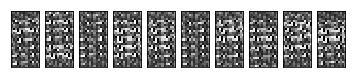

In [0]:
print("first 10 images of the bottleneck layer")
n=10
plt.figure()
for i in range(n):
  ax=plt.subplot(2,10,i+1)
  plt.imshow(conv_ae_hl[i].reshape((28,14)))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

10 reconstructed sample images


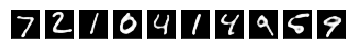

In [0]:
print("10 reconstructed sample images")
n=10
plt.figure()
for i in range(n):
  ax=plt.subplot(2,10,i+1)
  plt.imshow(reconstructed_images_conv[i].reshape((28,28)))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

#Part 3: Denoising AutoEncoder

In [0]:
#Inject noise into testing data
noise_factor = 0.25
data_train_noisy = data_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=data_train.shape)
data_test_noisy = data_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=data_test.shape)

#Clip to stay within valid (normalized) pixel range
data_train_noisy = np.clip(data_train_noisy, 0., 1.)
data_test_noisy = np.clip(data_test_noisy, 0., 1.)

#Reshape data to comply with input of denoising autoencoder
x_train = np.array(data_train_noisy).reshape(60000,28,28,1)
x_test = np.array(data_test_noisy).reshape(10000,28,28,1)

10 training sample images


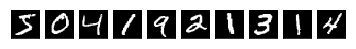

In [0]:
#Show samples of 10 original images and their corrsponding noisy counterparts from the training set
print("10 training sample images")
n=10
plt.figure()
for i in range(n):
  ax=plt.subplot(2,10,i+1)
  plt.imshow(data_train[i].reshape((28,28)))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

10 training sample images after injecting Gaussian Noise


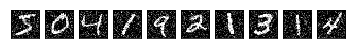

In [0]:
print("10 training sample images after injecting Gaussian Noise")
n=10
plt.figure()
for i in range(n):
  ax=plt.subplot(2,10,i+1)
  plt.imshow(data_train_noisy[i].reshape((28,28)))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

In [0]:
#Create denoising autoencoder architecture
def dae():
  
    model = Sequential()
    
      
    model.add(Conv2D(16,
                     (3,3),
                     activation='sigmoid',
                     padding='same',
                     input_shape=(28,28,1)))
    
    model.add(MaxPooling2D((2,2),
                           padding='same'
                           ))
    model.add(Conv2D(8,
                     (3,3),
                     activation='sigmoid',
                     padding='same'))
    
    model.add(MaxPooling2D(pool_size=(2,2),
                           padding='same',
                           ))
    model.add(Conv2D(8,
                     (3,3),
                     activation='sigmoid',
                     padding='same'))
    model.add(UpSampling2D((2,2)))
    model.add(Conv2D(16,
                     (3,3),
                     activation='sigmoid',
                     padding='same'))
    model.add(UpSampling2D((2,2)))
    model.add(Conv2D(1,
                     (3,3),
                     activation='sigmoid',
                     padding='same',
                     ))

    

    return model
  

dae_model = dae()

#Compile and train the DAE

dae_model.compile(loss='mse',
                 optimizer='adam',
                 metrics=['accuracy'])

dae_data = dae_model.fit(x_train, x_train, validation_data=(x_test, x_test), epochs=150, batch_size=512, shuffle=True)

#Generate denoised versions of noisy inputs
reconstructed_images_dae=dae_model.predict(x_test)


W1001 07:34:04.863253 140244466902912 deprecation_wrapper.py:119] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1001 07:34:04.906464 140244466902912 deprecation_wrapper.py:119] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1001 07:34:04.917335 140244466902912 deprecation_wrapper.py:119] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W1001 07:34:04.961072 140244466902912 deprecation_wrapper.py:119] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W1001 07:34:04.997801 140244466902912 deprecation_wrapp

Train on 60000 samples, validate on 10000 samples
Epoch 1/150
60000/60000 [==============================] - 75s 1ms/step - loss: 0.0904 - acc: 0.4167 - val_loss: 0.0830 - val_acc: 0.4172
Epoch 2/150
60000/60000 [==============================] - 74s 1ms/step - loss: 0.0735 - acc: 0.4183 - val_loss: 0.0631 - val_acc: 0.4210
Epoch 3/150
60000/60000 [==============================] - 73s 1ms/step - loss: 0.0579 - acc: 0.4289 - val_loss: 0.0538 - val_acc: 0.4365
Epoch 4/150
60000/60000 [==============================] - 73s 1ms/step - loss: 0.0510 - acc: 0.4402 - val_loss: 0.0485 - val_acc: 0.4443
Epoch 5/150
60000/60000 [==============================] - 73s 1ms/step - loss: 0.0471 - acc: 0.4456 - val_loss: 0.0453 - val_acc: 0.4478
Epoch 6/150
60000/60000 [==============================] - 73s 1ms/step - loss: 0.0441 - acc: 0.4490 - val_loss: 0.0425 - val_acc: 0.4512
Epoch 7/150
60000/60000 [==============================] - 73s 1ms/step - loss: 0.0416 - acc: 0.4516 - val_loss: 0.0402 - 

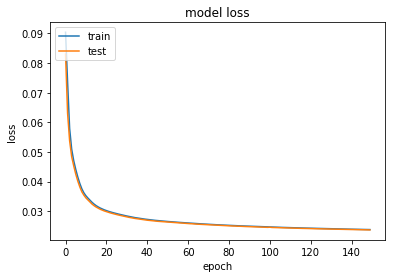

In [0]:
#Plot loss vs epoch
plt.plot(dae_data.history['loss'])
plt.plot(dae_data.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

10 testing sample images


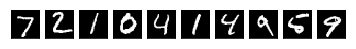

In [0]:
#Show samples of 10 original images, their noisy counterparts, and their de-noised images from the testing set
print("10 testing sample images")
n=10
plt.figure()
for i in range(n):
  ax=plt.subplot(2,10,i+1)
  plt.imshow(data_test[i].reshape((28,28)))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

10 testing sample images after adding Gaussian Noise


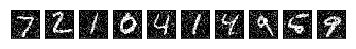

In [0]:
print("10 testing sample images after adding Gaussian Noise")
n=10
plt.figure()
for i in range(n):
  ax=plt.subplot(2,10,i+1)
  plt.imshow(data_test_noisy[i].reshape((28,28)))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

10 sample denoised images


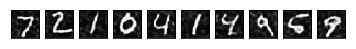

In [0]:
print("10 sample denoised images")
n=10
plt.figure()
for i in range(n):
  ax=plt.subplot(2,10,i+1)
  plt.imshow(reconstructed_images_dae[i].reshape((28,28)))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)